In [67]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

df = pd.read_csv('./data/btc-usd-max.csv',index_col=0,parse_dates=True )
df.drop(["market_cap", "total_volume"], axis=1, inplace=True)
df = df.resample('D').first()
df['price'].fillna(method='ffill', inplace=True)
# to get the log price
# df['price'] = np.log(df['price'])
df.index

DatetimeIndex(['2013-04-28 00:00:00+00:00', '2013-04-29 00:00:00+00:00',
               '2013-04-30 00:00:00+00:00', '2013-05-01 00:00:00+00:00',
               '2013-05-02 00:00:00+00:00', '2013-05-03 00:00:00+00:00',
               '2013-05-04 00:00:00+00:00', '2013-05-05 00:00:00+00:00',
               '2013-05-06 00:00:00+00:00', '2013-05-07 00:00:00+00:00',
               ...
               '2022-09-12 00:00:00+00:00', '2022-09-13 00:00:00+00:00',
               '2022-09-14 00:00:00+00:00', '2022-09-15 00:00:00+00:00',
               '2022-09-16 00:00:00+00:00', '2022-09-17 00:00:00+00:00',
               '2022-09-18 00:00:00+00:00', '2022-09-19 00:00:00+00:00',
               '2022-09-20 00:00:00+00:00', '2022-09-21 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='snapped_at', length=3434, freq='D')

In [68]:
# to resample to weekly data so calculations are wasier
df2 = df.resample(rule='W').mean()

In [69]:
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
import warnings
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
warnings.filterwarnings("ignore")

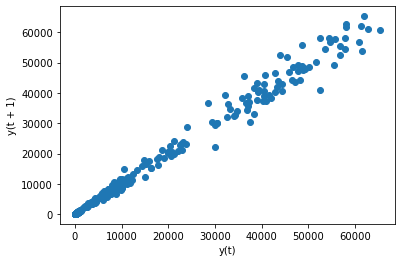

In [70]:
# lag_plot of bitcoin shows high autocorrelation
lag_plot(df2['price']);

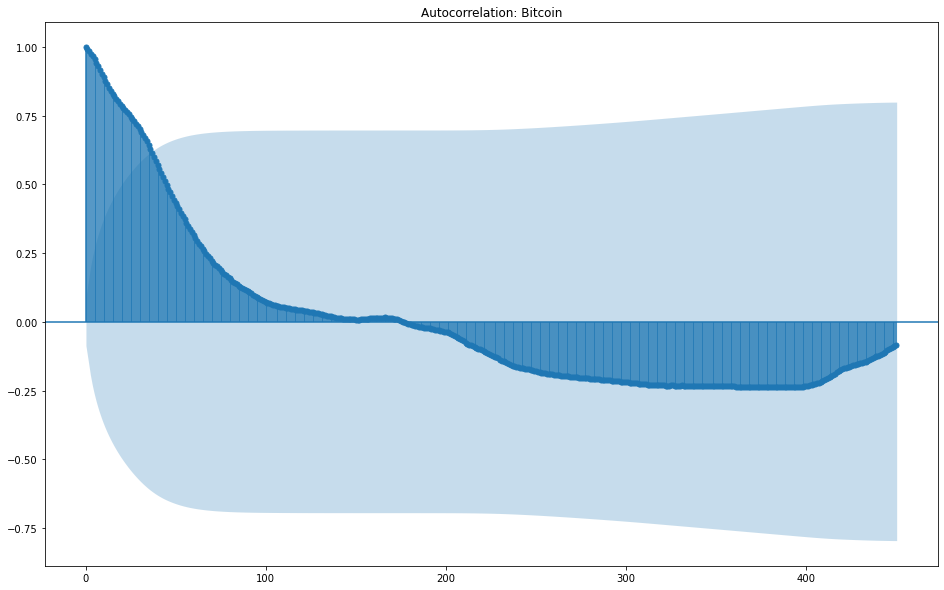

In [71]:
title = 'Autocorrelation: Bitcoin'
lags = 450
from pylab import rcParams
rcParams['figure.figsize']= 16,10
plot_acf(df2['price'],title=title,lags=lags);

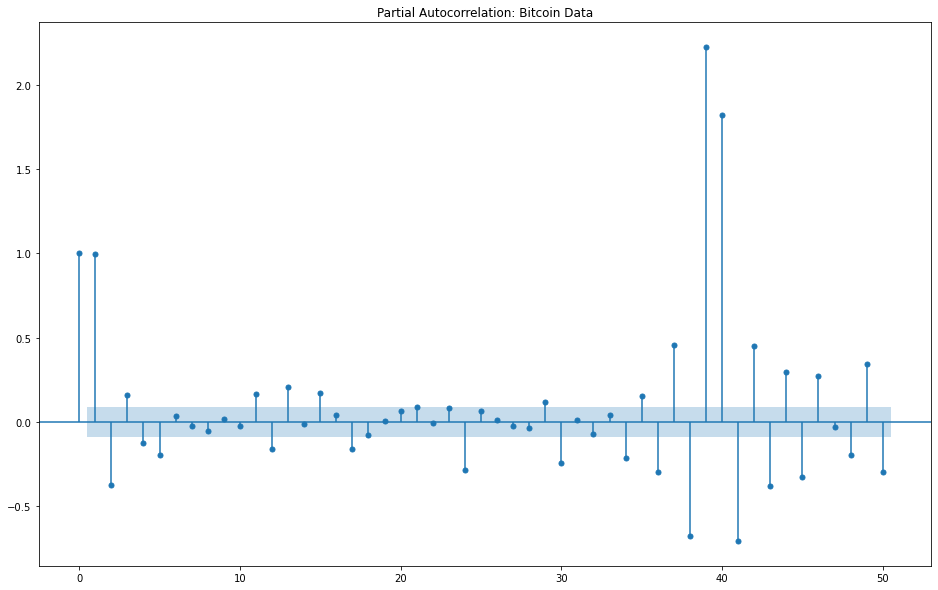

In [60]:
# bitcoin contains non stationary data
title='Partial Autocorrelation: Bitcoin Data'
lags=50
plot_pacf(df2,title=title,lags=lags);

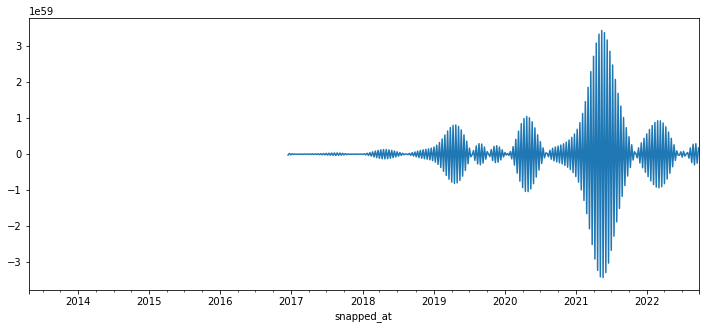

In [63]:
from statsmodels.tsa.statespace.tools import diff

df2['d1'] = diff(df2['price'],k_diff=190)
df2['d1'].plot(figsize=(12,5));

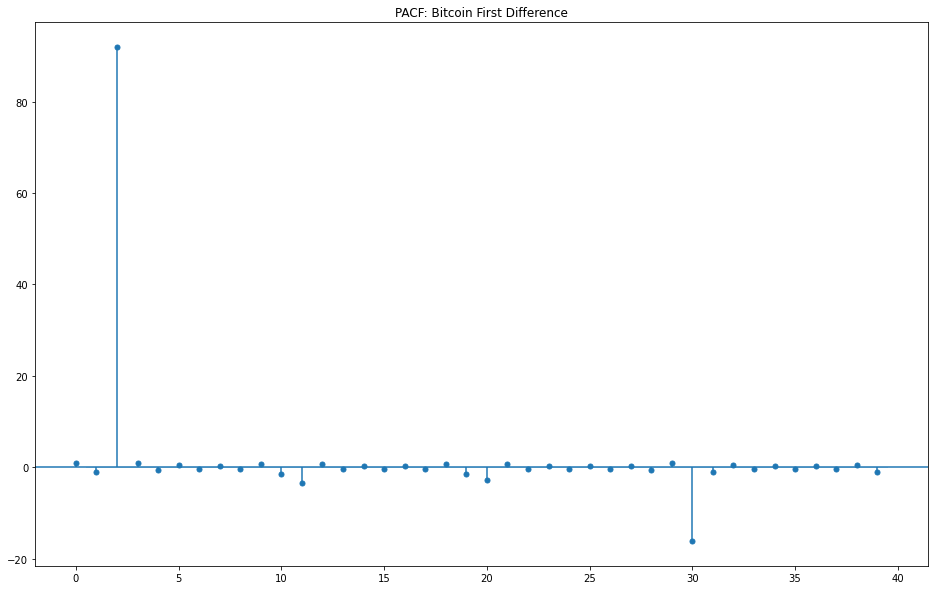

In [64]:
title='PACF: Bitcoin First Difference'
lags=40
plot_pacf(df2['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!